<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/practicasregresionlasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad** (test de Breusch-Pagan).  
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

#Practicas 26: Regresión Ridge y Lasso

#Nombre: Jose Daniel Isidoro Reyes

#Matrícula:261552

# Fecha: 24/10/2025

 # Paso 1: Configuración Inicial


* Carga el set de datos que puedes encontrar en el campus virtual ✅ Ejecutar las celdas de importación de librerías y carga del dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Carga del conjunto de datos
df  = pd.read_csv('/content/drive/MyDrive/Programación Analítica Predictiva/insurance.csv')

 * Familiarizarse con los datos usando .head(), .info() y .describe().

In [ ]:
# Impresión de primeras filas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Estadística Descriptiva del Conjunto de Datos
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<p align = "Justify"

El conjunto de datos no tiene valores faltantes, observamos que las variables sex, smoker y region no tienen el tipo de dato esperado (categorico).  Las variables númericas parecen distribuirse bien, con excepción de charges,  ya que el promedio y la mediana divergen. De igual manera, se observan valores muy extremos, por ejemplo,  63770, cuando el 75% de los datos son menores a 16639. Lo anterior siguiere que la variable charges podría exhibir un sesgo positivo.

# Paso 2: Análisis Exploratorio (EDA)

* Generar histogramas y boxplots para identificar distribuciones y outliers para variables  númericas


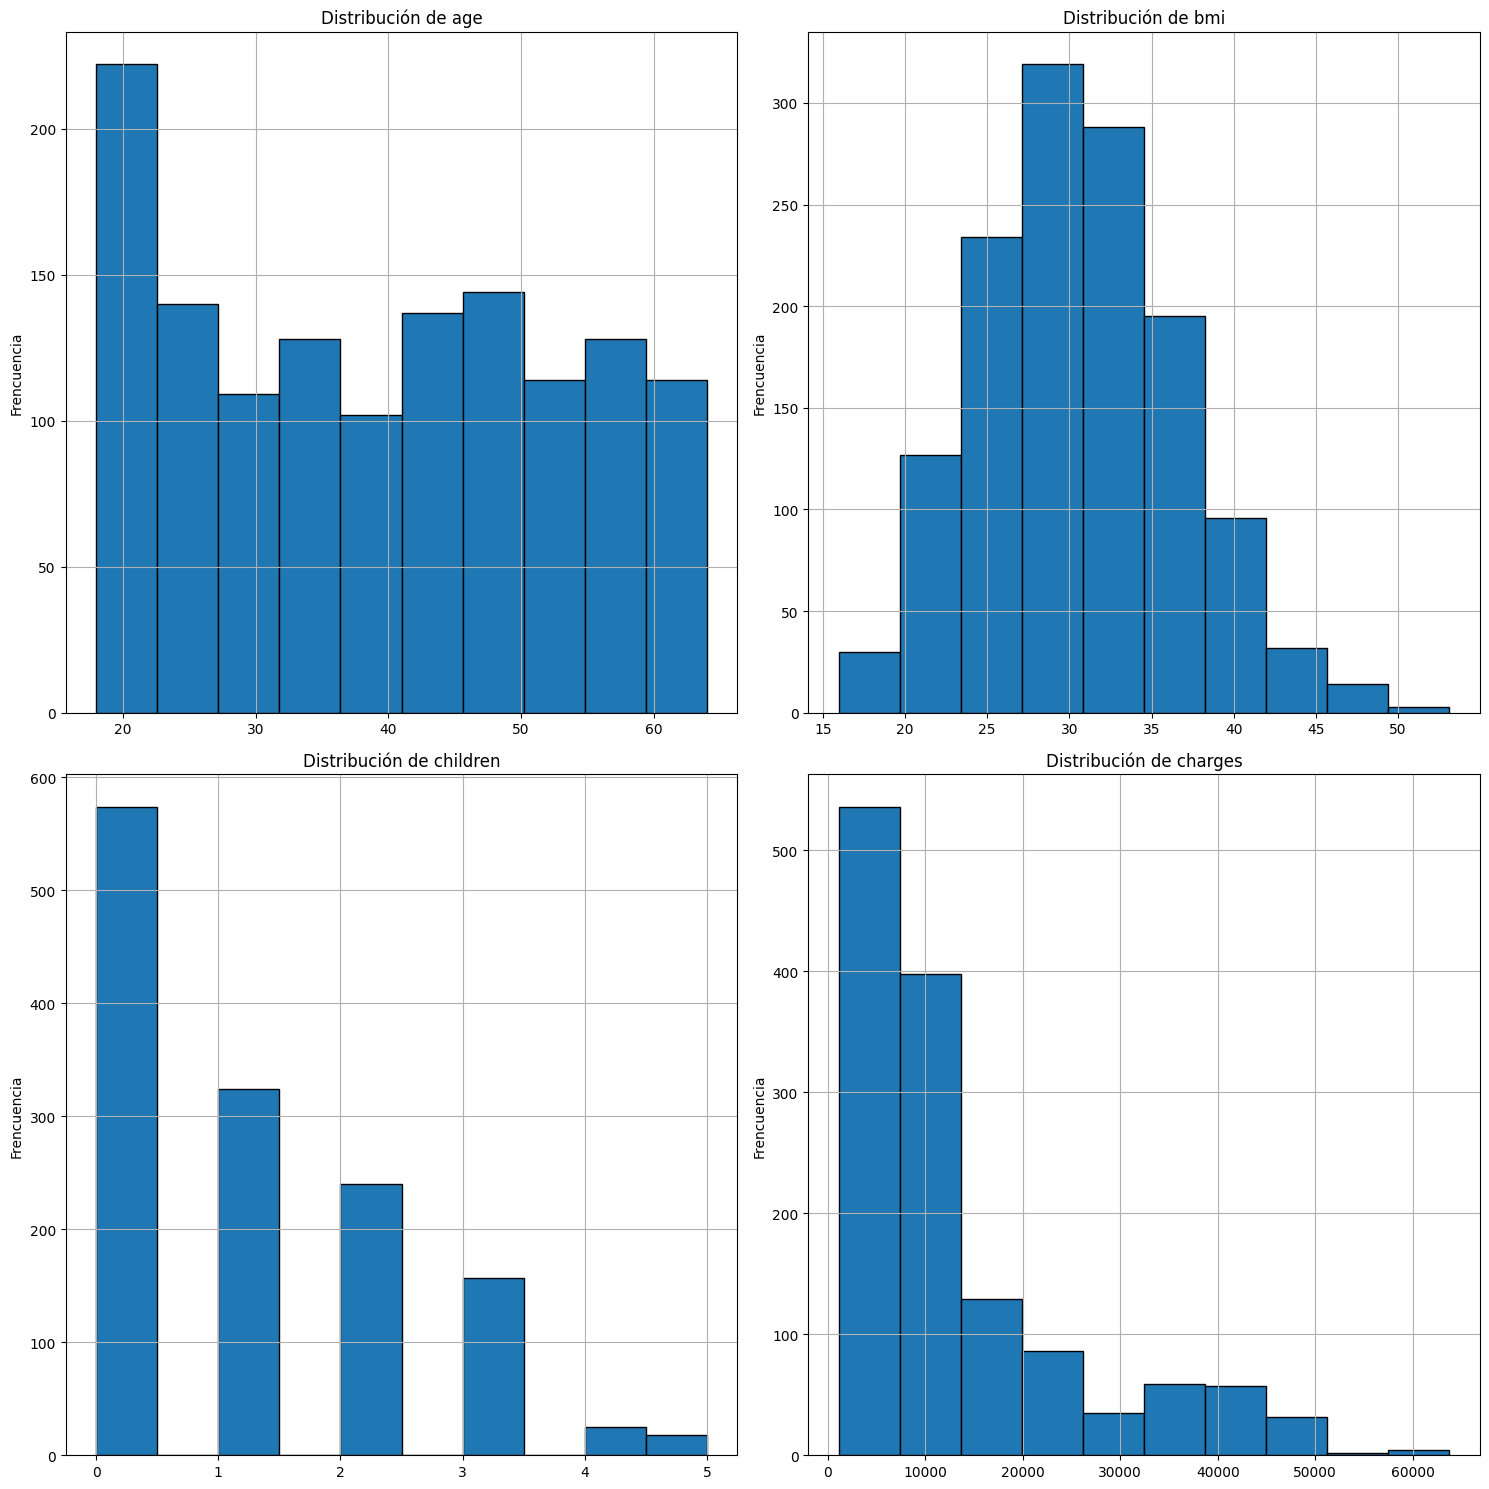

In [121]:
num_cols =  df.select_dtypes(include  =  ['number']).columns

n =  len(num_cols)
nrows =  2
ncols =  min(n, 2)

# Creación de Histogramas por Columna
fig, axes =  plt.subplots(nrows =  nrows, ncols =  ncols, figsize =  (15, 15))

# Aplanar el array en caso de que sea 2D
axes =  axes.flatten() if n > 1 else[axes]

for i, col in enumerate(num_cols):
    ax =  axes[i]
    df[col].hist(ax =  ax, bins =  10, edgecolor  = 'black')
    ax.set_title(f'Distribución de {col}')
    ax.set_ylabel('Frencuencia')

plt.tight_layout()

plt.show()

<p align = "Justify"

La variable de edad parece distribuirse de manera uniforme con excepción de una notable concentración de personas en el grupo de edad  de 20 años. La variable bmi parece distribuirse simetricamente aunque con un ligero sesgo postivo. Por otra parte, se confirma la sospecha de que la variable charges tiene un sesgo positivo, al igual que children, lo cual sugiere que es más frecuente observar valores a la derecha de la distribución de los datos.

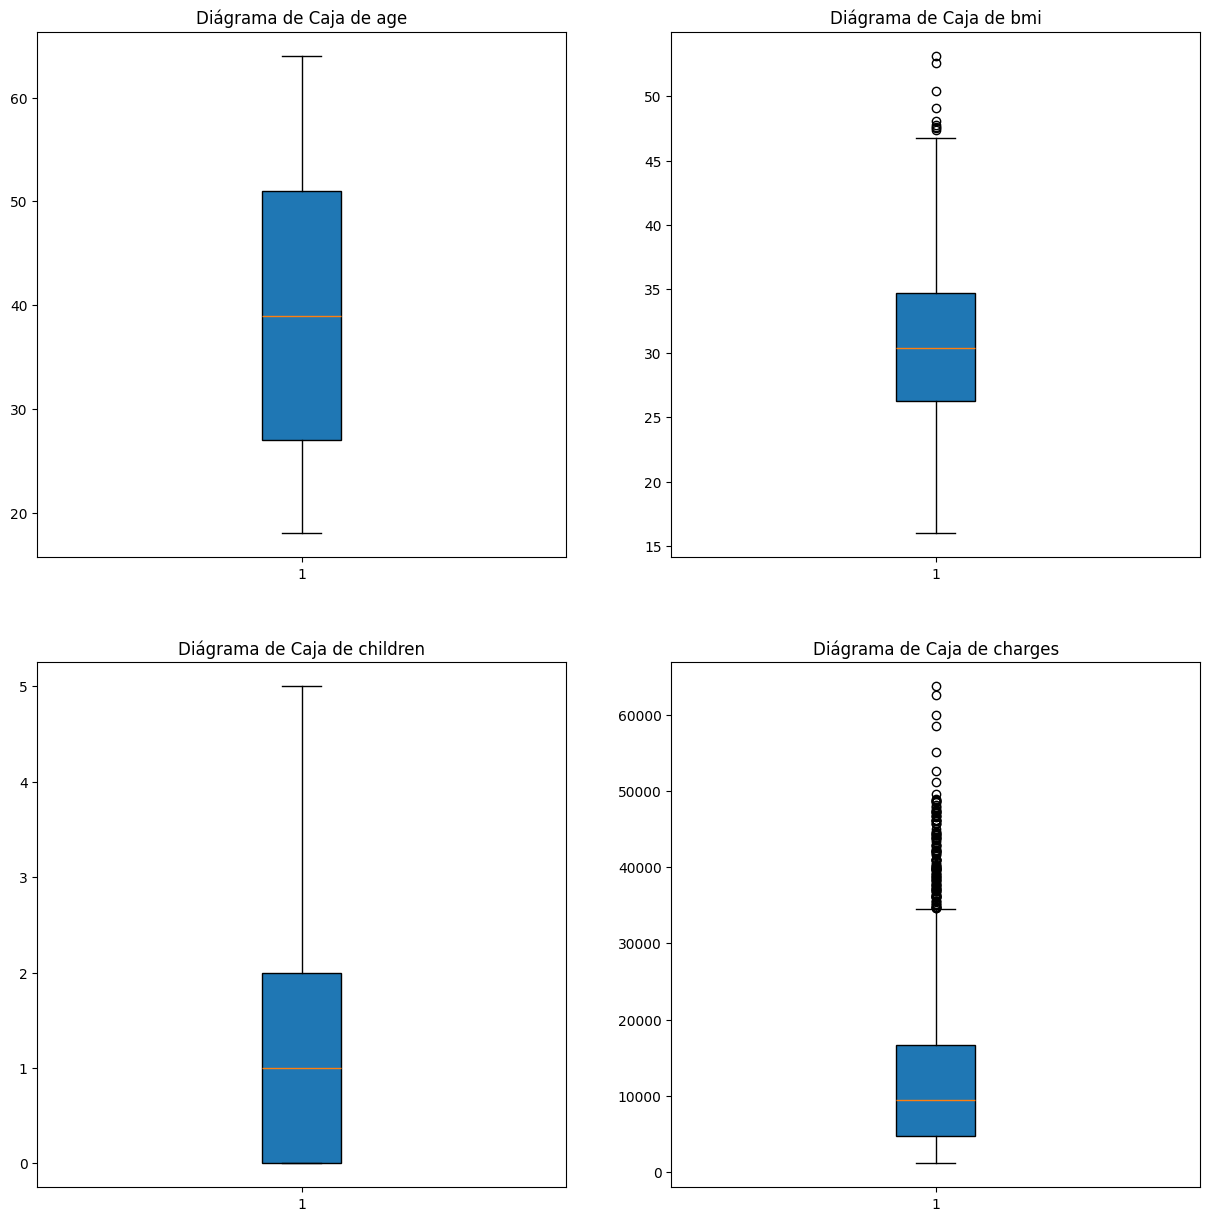

In [122]:
n =  len(num_cols)
nrows =  2
ncols =  min(n, 2)

# Creación de BoxPlot por Columna
fig, axes =  plt.subplots(nrows =  nrows, ncols =  ncols, figsize =  (15, 15))

# Aplanar el array en caso de que sea 2D
axes =  axes.flatten() if n > 1 else[axes]

# Gráfico de cajas por variable
for i, col in enumerate(num_cols):
    ax =  axes[i]
    ax.boxplot(df[col], vert =  True, patch_artist =  True)
    ax.set_title(f"Diágrama de Caja de {col}")


Los gráficos de Caja muestran que la variable charges y bmi tienen una cantidad importante  de valores atípicos, los cuales necesitan tratamiento para evitar sesgo en los resultados.

* Para variables categóricas: Usar gráficos de barras para visualizar frecuencias.

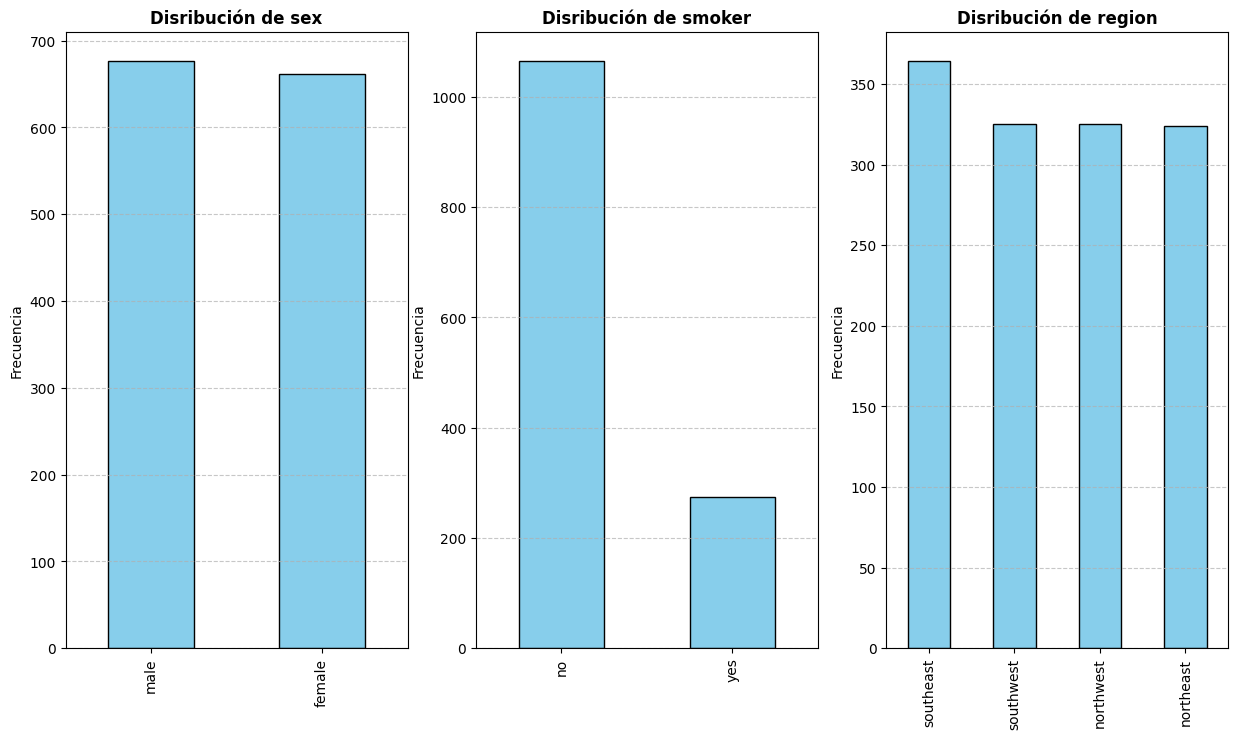

In [124]:
cat_cols =  df.drop(columns =  num_cols)

n =  len(cat_cols)
nrows =  1
ncols =  3

# Creación de BoxPlot por Columna
fig, axes =  plt.subplots(nrows =  nrows, ncols =  ncols, figsize =  (15, 8))

# Aplanar el array en caso de que sea 2D
axes =  axes.flatten() if n > 1 else[axes]

for i, col in enumerate(cat_cols):
    ax =  axes[i]
    df[col].value_counts().plot(kind  = 'bar', ax =  ax, color  = 'skyblue', edgecolor  = 'black')
    ax.set_title(f'Disribución de {col}', fontsize =  12, fontweight = 'bold')
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')
    ax.grid(axis  = 'y', linestyle = '--', alpha  = 0.7)




<p align = "Justify"

Por otra parte,  observamos una hay una cantidad similar de hombres y mujeres en la muestra. En contraste con smoker, donde existe una mayor cantidad de no fumadores vs fumadores. Finalmente, se observa  una distribución similar por regiones, con excepción de southeast.

* Calcular medidas de tendencia central y dispersión para variables númericas.

In [ ]:
df[num_cols].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Paso 3: Matriz de Correlación

* Calcular la matriz de correlación solo para variables numéricas.


In [125]:
# Matrix de correlación

df[num_cols].corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* Generar un mapa de calor para visualizar relaciones.
📌 Pregunta: ¿Qué variables están más correlacionadas con el target (charges)?

Text(0.5, 1.0, 'Heatmap de Correlaciones')

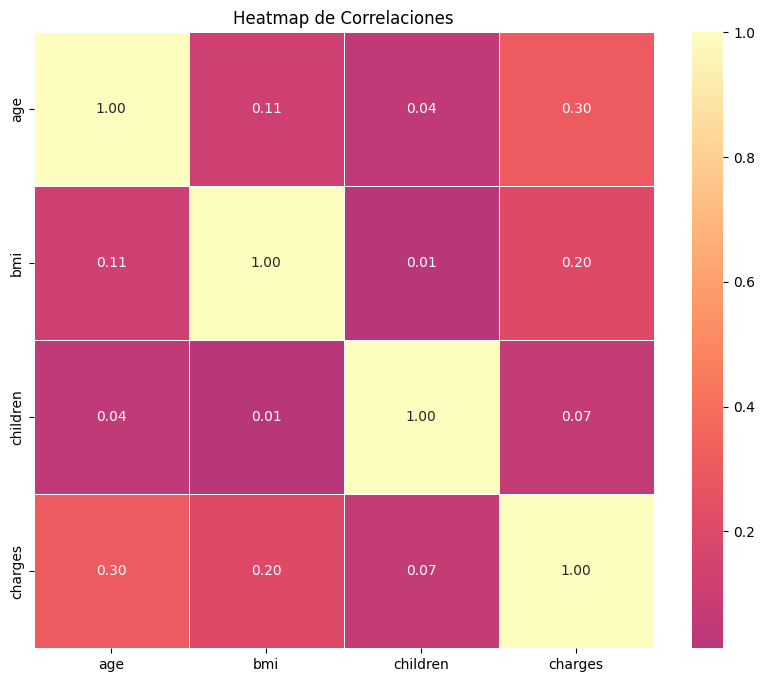

In [ ]:
plt.figure(figsize =  (10, 8))
sns.heatmap(df[num_cols].corr(), annot  =  True, fmt  = ".2f", linewidths= 0.5, cmap =  'magma', center =  0)
plt.title('Heatmap de Correlaciones')

<p align = "Justify"

Se observa que la variable charges tiene un correlación positiva baja con las variables Age (0.30) y bmi (0.20), y una correlación inexistente con la variable children (0.07). De manera general, se observa que las variables númericas no están fuertemente correlacionadas entre sí, lo cual sugiere que no encontraremos problemas de multicolinealidad.

# Paso 4: Preprocesamiento
🔧 Tareas:

* Manejar valores faltantes con SimpleImputer.
* Codificar variables categóricas con OneHotEncoder.
* Estandarizar variables numéricas con StandardScaler.
* Verificar que el dataset transformado no tenga valores nulos.

In [127]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

# Pipeline de Preprocesamiento
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')),
                      ('scaler', StandardScaler())]), num_cols),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))]), cat_cols)
])
# Aplicar transformaciones
X_procesado  =  preprocessor.fit_transform(df)
y =  df[['charges']]

# Verificación de valores núlos en el df procesado
print("Nulos en X_transformed:", np.isnan(X_procesado).sum())

Nulos en X_transformed: 0


# Paso 5: Modelado (Lasso y Ridge)

* Ajustar el modelo con los hiperparámetros dados (alpha=0.1 para Lasso, alpha=1.0 para Ridge).


In [128]:
# Creación de Conjunto de Prueba y Entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_procesado, y, test_size = 0.2, random_state =  42)


### Modelo Ridge

In [132]:
from sklearn.linear_model import Ridge


ridgeR =  Ridge(alpha  =  1.0)
ridgeR.fit(X_train, y_train)


num_features = num_cols
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_features, cat_features])


y_pred_ridge =  ridgeR.predict(X_train)
y_pred_test_ridge =  ridgeR.predict(X_test)

# Obteción de los coefficientes
ridge_coeficientes = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': ridgeR.coef_
})
ridge_coeficientes

,Variable,Coeficiente
0,age,3603.270803
1,bmi,2051.938363
2,children,513.153656
3,sex_male,-10.635579
4,smoker_yes,23514.634824
5,region_northwest,-366.152625
6,region_southeast,-643.009456
7,region_southwest,-802.913351


* Calcular MSE y R² para evaluar rendimiento.


In [130]:
# Métricas conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Métricas para el entrenamiento
mse_train  =  mean_squared_error(y_train, y_pred_ridge)
r2_train  =  r2_score(y_train, y_pred_ridge)

# Métricas para prueba
mse_test =  mean_squared_error(y_test, y_pred_test_ridge)
r2_test =  r2_score(y_test, y_pred_test_ridge)

print("Resultados Ridge Regresion")
print(f"MSE (Train): {mse_train:.4f}")
print(f"MSE (Test): {mse_test:.4f}")

print(f"R² (Train): {r2_train:.4f}")
print(f"R² (Test): {r2_test}")



Resultados Ridge Regresion
MSE (Train): 37280722.1790
MSE (Test): 33645391.3006
R² (Train): 0.7417
R² (Test): 0.7832807329420659


* Analizar los coeficientes para identificar variables importantes.

Text(0, 0.5, 'Costo de la Poliza')

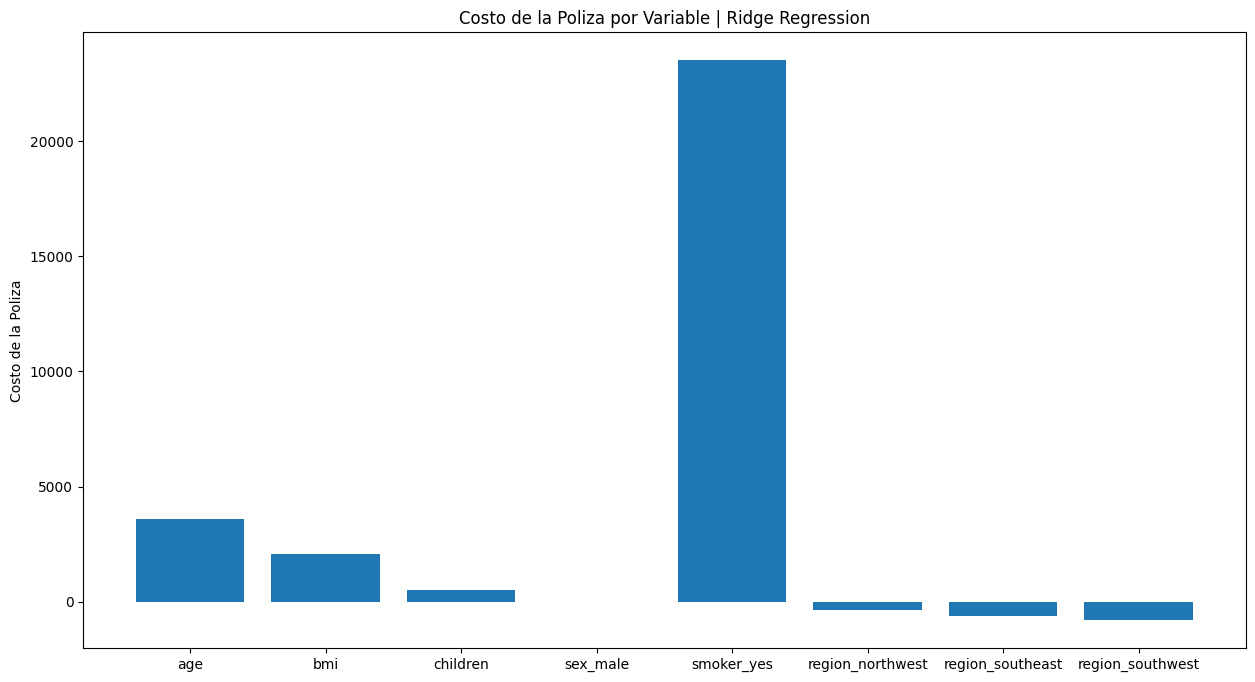

In [138]:
fig, ax =  plt.subplots(figsize =  (15, 8))

ax.bar(
    ridge_coeficientes['Variable'], ridge_coeficientes['Coeficiente']
)
plt.title('Costo de la Poliza por Variable | Ridge Regression')
plt.ylabel('Costo de la Poliza')

<p align = "Justify"

Se observa que el precio del seguro aumentamente significativamente cuando la persona es fumadora aproximadamente (23514 dolares) en comparación con una persona no fumadora. La segunda variable más importante, es la edad que  incrementa el costo del seguro en aproximadamente  3603 dolares por cada año adicional. Adicionalmente, por cada hijo se espera un incremento de 513.15 dolares en la poliza de seguro. La variable sexo parece tener un efecto marginal sobre el costo de la poliza. Finalmente, las regiones northwest, southeast y southwest se asocian con un costo de poliza menor en comparación con la zona northeast. Considerando  el grado de penalización aplicada, la unica variable que parece estar fuertemente penalizada es children.

### Modelo Lasso

In [136]:
from sklearn.linear_model import Lasso

# Train the model
lasso  =  Lasso(alpha  =  0.1)
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

# Obteción de los coeficientes
lasso_coeficientes = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': lasso.coef_
})

lasso_coeficientes

,Variable,Coeficiente
0,age,3609.055670
1,bmi,2054.667314
2,children,512.382874
3,sex_male,-18.137005
4,smoker_yes,23650.480453
5,region_northwest,-369.042679
6,region_southeast,-656.108046
7,region_southwest,-808.129182


* Calcular MSE y R² para evaluar rendimiento.

In [ ]:
# Métricas para entrenamiento
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)

# Métricas para prueba
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)


print("Resultados Lasso Regression")
print(f"MSE (Train): {mse_train_lasso:.4f}")
print(f"R²  (Train): {r2_train_lasso:.4f}")
print(f"MSE (Test):  {mse_test_lasso:.4f}")
print(f"R²  (Test):  {r2_test_lasso:.4f}")

Resultados Lasso Regression
MSE (Train): 37277748.4626
R²  (Train): 0.7417
MSE (Test):  33605723.7687
R²  (Test):  0.7835


* Analizar los coeficientes para identificar variables importantes.

Text(0, 0.5, 'Costo de la Poliza')

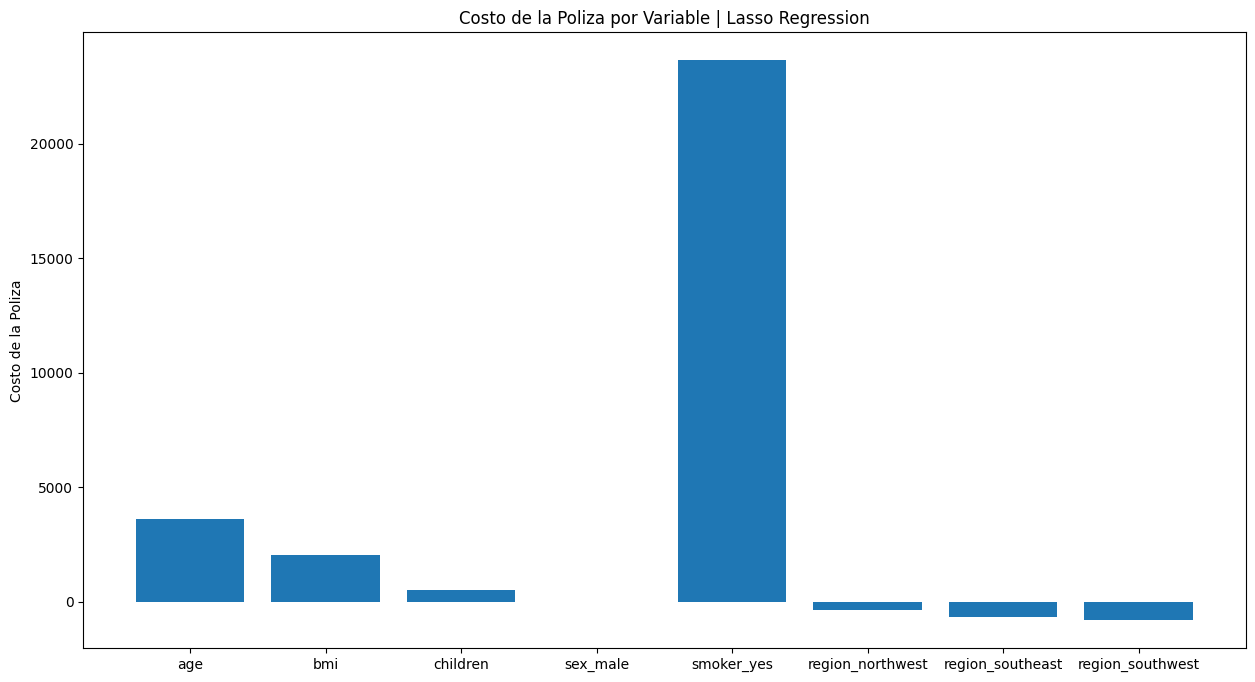

In [139]:
fig, ax =  plt.subplots(figsize =  (15, 8))

ax.bar(
    lasso_coeficientes['Variable'], lasso_coeficientes['Coeficiente']
)
plt.title('Costo de la Poliza por Variable | Lasso Regression')
plt.ylabel('Costo de la Poliza')

<p align = "Justify"

Se observan pequeñas diferencias respecto a Ridge Regression, sin embargo, ningun coeficiente es 0 sugieriendo que todas las variables son importantes  en el modelo considerando las penalizaciones aplicadas en ambos modelos. La interpretación es similar a la de la regression ridge, smoker es la variable más importante, seguido de age, bmi, children para explicar el precio de la poliza.

# Paso 6: Verificación de Supuestos

Linealidad (gráfico de residuos vs predicciones).


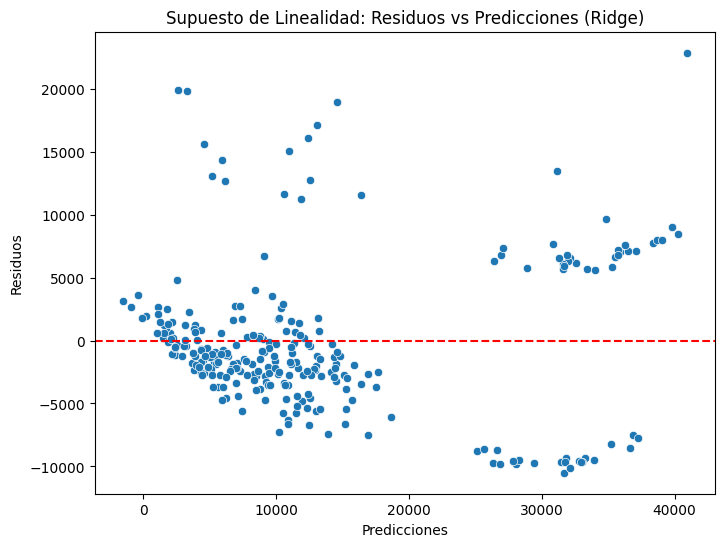

In [ ]:
# Ridge Regression
residuos_ridge  =  y_test.values.ravel() -  y_pred_test_ridge

plt.figure(figsize =  (8, 6))
sns.scatterplot(x =  y_pred_test_ridge, y = residuos_ridge )
plt.axhline(0, color  = 'red', linestyle  =  '--')
plt.title('Supuesto de Linealidad: Residuos vs Predicciones (Ridge)')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

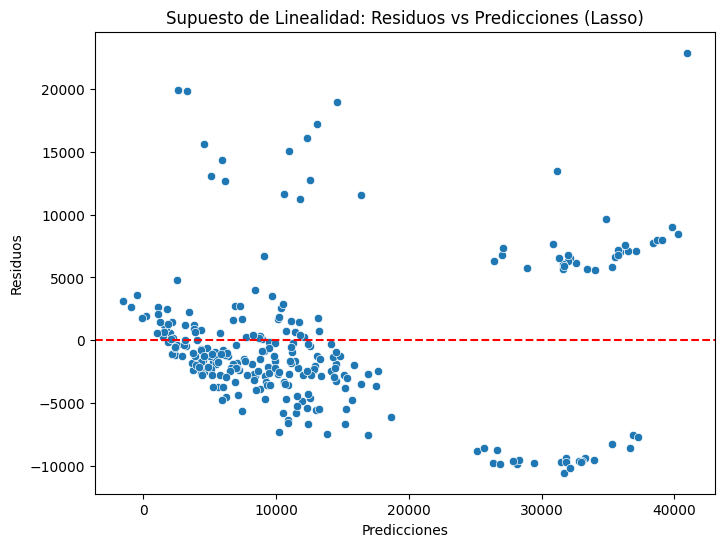

In [ ]:
# Regresion Lasso

residuos_lasso  =  y_test.values.ravel() -  y_pred_test_lasso

plt.figure(figsize =  (8, 6))
sns.scatterplot(x =  y_pred_test_lasso, y =  residuos_lasso)
plt.axhline(0, color  = 'red', linestyle  =  '--')
plt.title('Supuesto de Linealidad: Residuos vs Predicciones (Lasso)')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

* Normalidad de residuos (QQ-Plot y test de Shapiro-Wilk).

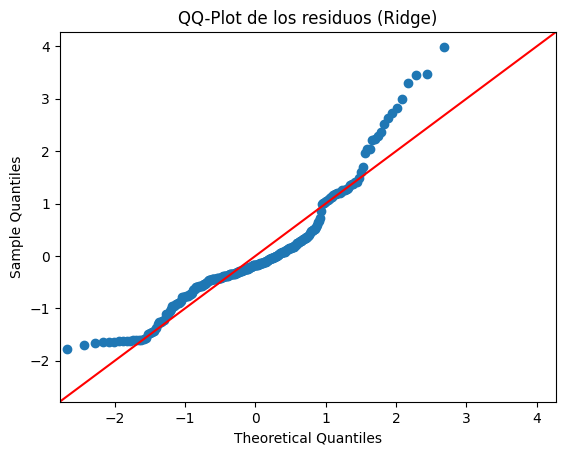

In [ ]:
import statsmodels.api as sm

sm.qqplot(residuos_ridge, line  = '45', fit = True)
plt.title('QQ-Plot de los residuos (Ridge)')
plt.show()

In [ ]:
import scipy.stats as stats
stat, p_value =  stats.shapiro(residuos_ridge)
print(f"Shapiro-Wilk Test: estadístico = {stat:.4f}, p-valor  = {p_value:.4f}")
if p_value > 0.05:
    print('No rechazamos H0, los residuos se distribuyen normalmente')
else:
    print('Se rechaza H0, los residuos no distribuyen normalmente')

Shapiro-Wilk Test: estadístico = 0.9138, p-valor  = 0.0000
Se rechaza H0, los residuos no distribuyen normalmente


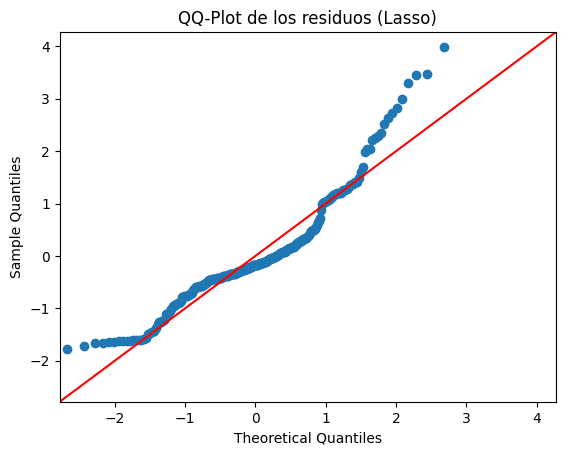

In [ ]:
sm.qqplot(residuos_lasso, line  = '45', fit = True)
plt.title('QQ-Plot de los residuos (Lasso)')
plt.show()

In [ ]:
import scipy.stats as stats
stat, p_value =  stats.shapiro(residuos_lasso)
print(f"Shapiro-Wilk Test: estadístico = {stat:.4f}, p-valor  = {p_value:.4f}")
if p_value > 0.05:
    print('No rechazamos H0, los residuos se distribuyen normalmente')
else:
    print('Se rechaza H0, los residuos no distribuyen normalmente')

Shapiro-Wilk Test: estadístico = 0.9139, p-valor  = 0.0000
Se rechaza H0, los residuos no distribuyen normalmente


<p align = "Justify"

Los gráficos QQ y las pruebas Shapiro-Wilk sugieren que los residuales no se distribuyen normalmente para los 2 modelos (Ridge y Lasso). Este problema viola los supuestos de los estimadores de Mínimos Cuadrados Ordinarios lo cual puede dar como consecuencia que los  coeficientes presente sesgo,   y que los intervalos de predicción y  las pruebas de significancia sean incorrectas. Este problema requiere mayor atención, por ejemplo, transformar la variable charges ya que vimos que tiene sesgo positivo (por ejemplo, una transformación logaritmica).

* Homocedasticidad (test de Breusch-Pagan).


In [118]:
from statsmodels.stats.diagnostic import het_breuschpagan
X_test_const =  sm.add_constant(X_test)
bp_test  =  het_breuschpagan(residuos_ridge, X_test_const)

p_value = bp_test[3]
if p_value > 0.05:
    print("No se rechaza H0, no hay problemas de Heterocedasticidad")
else:
    print('Se rechaza H0,  hay problemas de heterocedasticidad')

Se rechaza H0,  hay problemas de heterocedasticidad


In [119]:
X_test_const =  sm.add_constant(X_test)
bp_test  =  het_breuschpagan(residuos_lasso, X_test_const)

p_value = bp_test[3]
if p_value > 0.05:
    print("No se rechaza H0, no hay problemas de Heterocedasticidad")
else:
    print('Se rechaza H0,  hay problemas de heterocedasticidad')

Se rechaza H0,  hay problemas de heterocedasticidad


<p align = "Justify"

Las pruebas de Breush Pagan sugieren que ambos modelos tienen problemas de herocedasticidad, es decir, el error no es constante a medida que aumenta los precios de las polizas. Este problema puede dar lugar a pruebas de significancia e intervalos de confianza erroneos. Es posible que con la transformación de la variable charges se puede solventar el problema. Otro enfoque podía ser la estimación de errores robustos.

* Multicolinealidad (VIF > 10 indica problema).

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif =  pd.DataFrame(X_procesado, columns =  feature_names)

vif_df =  pd.DataFrame()
vif_df['Variable'] = X_vif.columns
vif_df['VIF'] =  [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_df

,Variable,VIF
0,age,1.015843
1,bmi,1.088673
2,children,1.003348
3,sex_male,1.674830
4,smoker_yes,1.228075
5,region_northwest,1.223453
6,region_southeast,1.357419
7,region_southwest,1.215686


<p align = "Justify"


Se observa que no existe problema de multicolinealidad ya que el VIF es menor a 10. Esto es soportado por el analisis de correlación hecho con anterioridad pues no existía una correlación fuerte entre las variables.

# Paso 7: Comparación Final


* ¿Qué modelo es más interpretable?

Parece no haber mucha diferencia en los coeficientes de ambos métodos, se observa que el precio de la poliza se asocia postivamente con si la persona es fumadora, tiene hijos, y un alto nivel de indice corporal. Considero que Lasso puede ser más interpretable al eliminar variables irrelevantes, sin embargo, con el grado de penalización aplicado, en ambos modelos se consideran importantes todas las variables.

¿Cuál reduce mejor el sobreajuste?

No se observa gran diferencia de ajuste bajo ambas metodologías,  aproximadamente el 74% de las variables del  precio de la poliza son explicados por ambos modelos en el conjunto de entrenamiento, y el aproximadamente el 78% en el conjunto de prueba.

¿Qué variables son más importantes en cada caso?

La variable más importate si es la persona es fumador, seguido de edad, hijos e índice de masa corporal.

**Evaluación Final**

* Ambos métodos consideran importantes todas las variables con la penalización aplicada. Ambos modelos presentan problemas de normalidad de los residuos, así como de heterocedasticidad, que dan lugar a problemas de estimadores segores, y pruebas de hipótesis e intervalos de confianza errores, problemas que requiere atención mayor.

* No se observan problemas de overfitting o underfitting ya que las métricas mse y r2 son similares en los conjuntos de prueba y entranamiento. De igual manera, no se observan problemas de multicolinealidad.